## Myers-Briggs Type Indicator® (MBTI®) Personality Type Prediction

<p><span style="color: Blue; font-family: Babas; font-size: 1.3em;"> We will predict the personality type of people from their social media posts.

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axes:

`Introversion (I) – Extroversion (E)`

`Intuition (N) – Sensing (S)`

`Thinking (T) – Feeling (F)`

`Judging (J) – Perceiving (P)`

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> So for example, someone who prefers __Introversion__, __Intuition__, __Thinking__ and __Perceiving__ would be labelled an `INTP` in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.


## Importing Libaries

In [6]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors


## NLP
import contractions
import inflect
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [7]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('white')

## Visualization Settings

In [8]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [9]:
## Reading file
df = pd.read_csv('mbti_1.csv')

In [10]:
df.head()

,type,posts
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types..."
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg|||http://img.adultdvdtalk.com/813a0c6243814cab84c51|||I over think things sometimes. I go by the old Sherlock Holmes quote. Perhaps, when a man has special knowledge and special powers like my own, it rather encourages him to seek a complex...|||cheshirewolf.tumblr.com So is I :D|||400,000+ post|||Not really; I've never thought of E/I or J/P as real functions. I judge myself on what I use. I use Ne and Ti as my dominates. Fe for emotions and rarely Si. I also use Ni due..."
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in t

Our dataset has __2 columns__. While the first one contains __the personality type__, on the other hand second column contains __the post__ belongs to person whose personality type is alreday given in type column. 

In [11]:
## We have 8675 observations in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [12]:
df.shape

(8675, 2)

## Sample List of Posts

In [13]:
## This shows a sample post belongs to a person.
[p.split('|||') for p in df.head(1).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

### The number of users is __8675__

## Mapping Personalities

In [14]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [15]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

As seen from the above figures, __the most common personality type is `INTP`__. First four most common ones are `Introversion` type of personalities. 

### Let's check our data through some exploratory data analysis. 

## EDA

<Figure size 432x288 with 0 Axes>

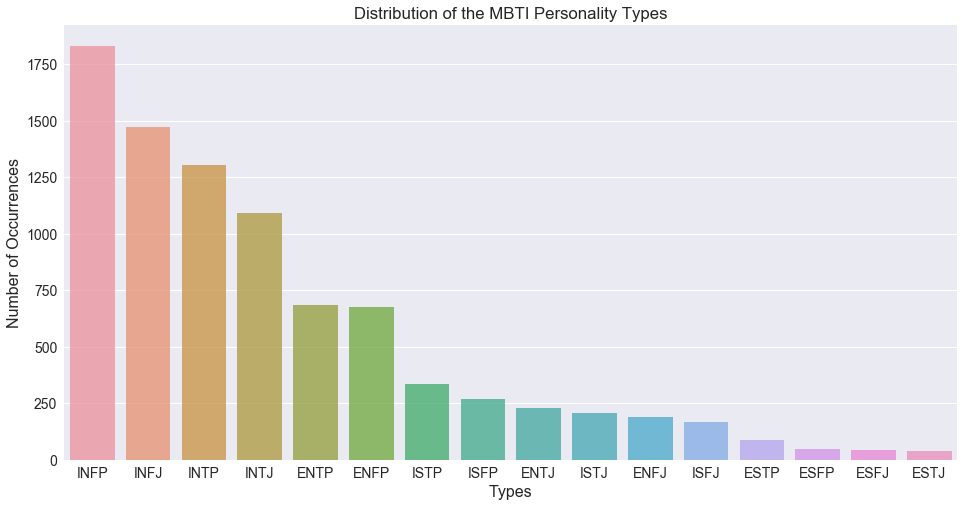

In [16]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
#plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. At the same time least common four types are __Extroversion__.This is __`unbalanced`__ data as we can understand from the graphic.

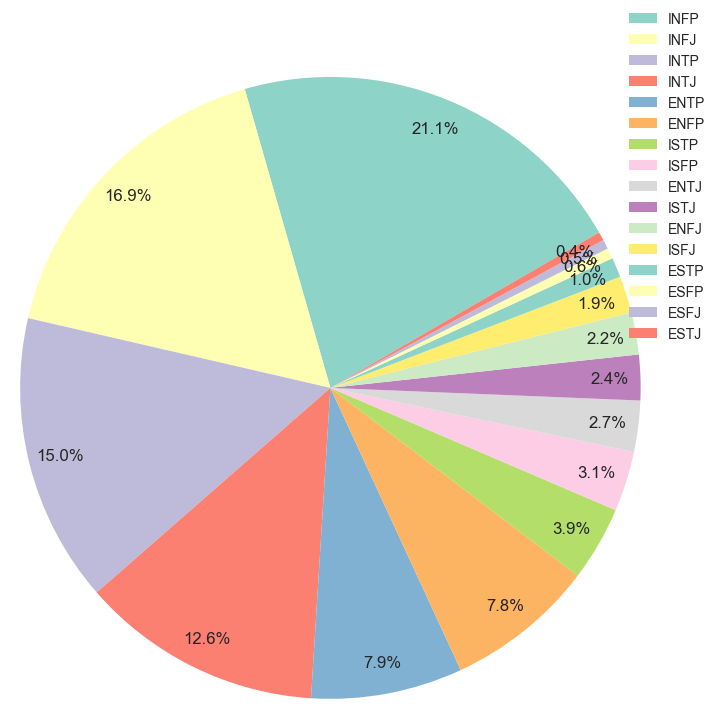

In [17]:
# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

Let's see the personality types characteristics explicitly.

In [18]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [19]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

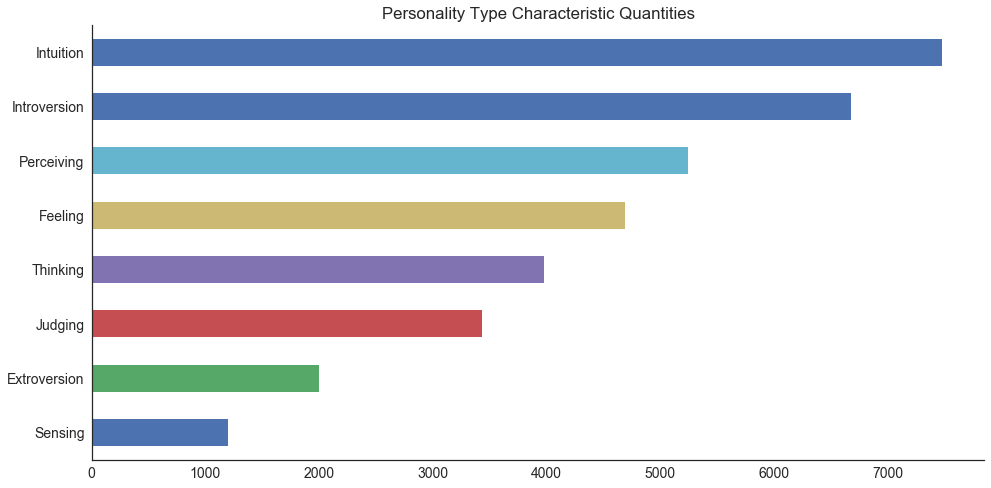

In [20]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh().set_title('Personality Type Characteristic Quantities')
sns.despine()
plt.show()

As we see from the bar graphic the most common personality type is the people with `Intuition` and the least one is `Sensing`. We conclude that people are tend to be more Intuitative compared to Sensing.

In [21]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [22]:
def get_types(person):
    
    """This function classify personality types in binary such as while Introversion gets 1, Extroversion gets 0 so on"""
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': # Introversion = 1
        I = 1
    elif selected_type[0] == 'E': # Extroversion = 0
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': # Intuition = 1
        N = 1
    elif selected_type[1] == 'S': # Sensing = 0
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': # Thinking = 1
        T = 1
    elif selected_type[2] == 'F': # Feeling = 0
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': # Judging = 1
        J = 1
    elif selected_type[3] == 'P': # Perceiving = 0
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE': I, 'NS': N , 'TF': T, 'JP': J }) 

In [23]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [24]:
## We can see the posts, each post length and binary classified personality types
df= data
df.head()

,type,posts,post_length,IE,JP,NS,TF
0,INFJ,"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389 84390 http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...",4652,1,1,1,0
1,ENTP,"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher. Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg|||http://img.adultdvdtalk.com/813a0c6243814cab84c51|||I over think things sometimes. I go by the old Sherlock Holmes quote. Perhaps, when a man has special knowledge and special powers like my own, it rather encourages him to seek a complex...|||cheshirewolf.tumblr.com So is I :D|||400,000+ post|||Not really; I've never thought of E/I or J/P as real functions. I judge myself on what I use. I use Ne and Ti as my dominates. Fe for emotions and rarely Si. I also use Ni due...",7053,0,0,1,1
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there. And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful 

## Personality Type Quantities in Binary Comprassion

In [25]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[1], " - ", df['IE'].value_counts()[0])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[1], " - ", df['NS'].value_counts()[0])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[1], " - ", df['TF'].value_counts()[0])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[1], " - ", df['JP'].value_counts()[0])

Introversion (I) - Extroversion (E):	 6676  -  1999
Intuition    (N) – Sensing      (S):	 7478  -  1197
Thinking     (T) – Feeling      (F):	 3981  -  4694
Judging      (J) – Perceiving   (P):	 3434  -  5241


The first column shows `Introversion`, `Intuition`, `Thinking` and `Judging` respectively from top to bottom and second column is for `Extroversion`, `Sensing`, `Feeling` and `Perceiving`. As we can see from the numbers above, __the most common characteristic of people in this dataset is being Intuition and then being Introversion.__ Let's visualize this by a graphic.

<Figure size 432x288 with 0 Axes>

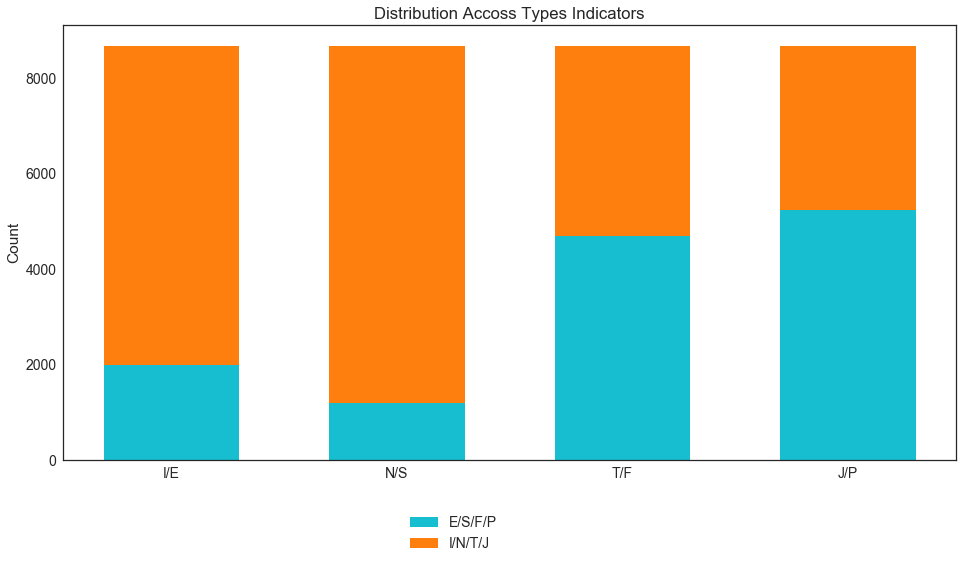

In [26]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('E/S/F/P', 'I/N/T/J'), loc=1, bbox_to_anchor=(0.5,-0.1))
plt.show()

### Thinking vs Feeling and Judging vs Preceiving types are more evenly distributed.

### Let's explore what type of personalties are more inclined to write more. 

In [27]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

<Figure size 432x288 with 0 Axes>

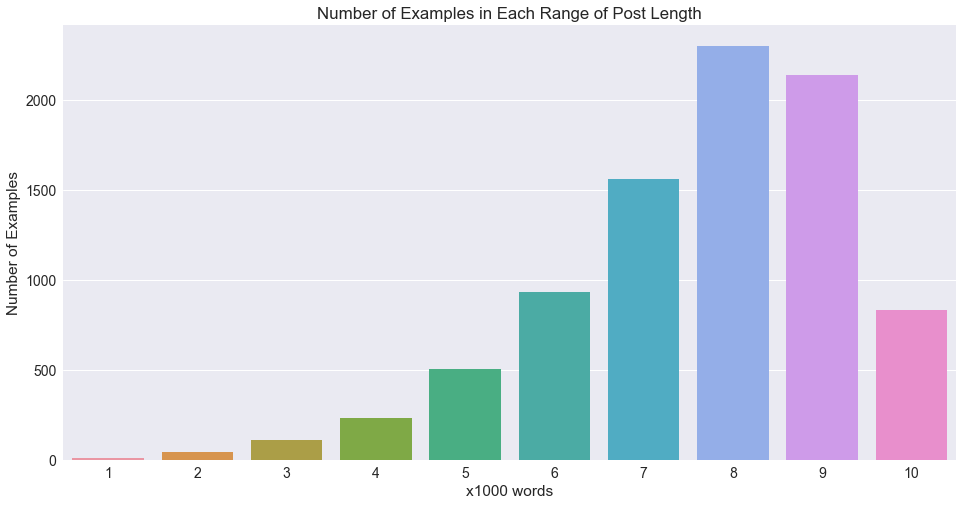

<Figure size 432x288 with 0 Axes>

In [28]:
visualization_settings()

ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()

sns.barplot(cnt.index, cnt.values)
sns.set_style('white')

plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

plt.show()
sns.despine()

<Figure size 432x288 with 0 Axes>

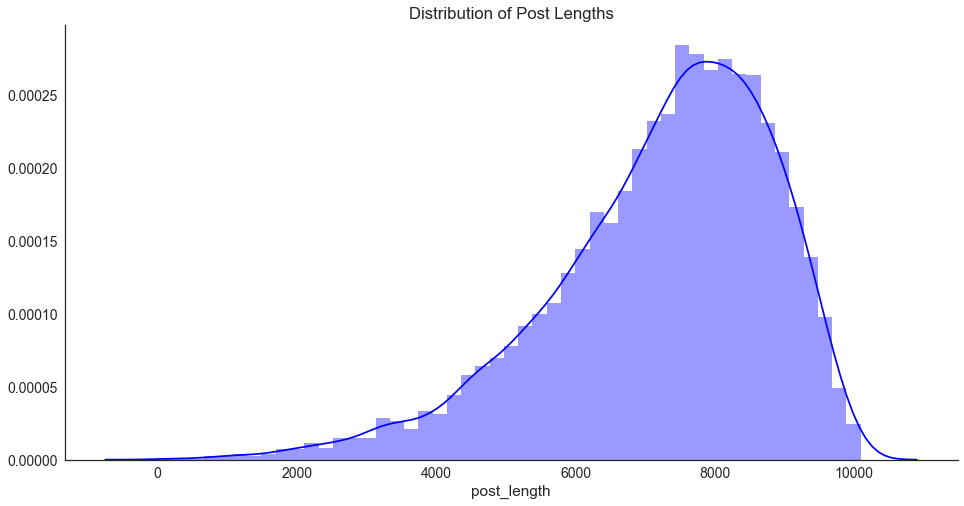

In [29]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='blue').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts). Post length distribution seems normal distributed.

<Figure size 432x288 with 0 Axes>

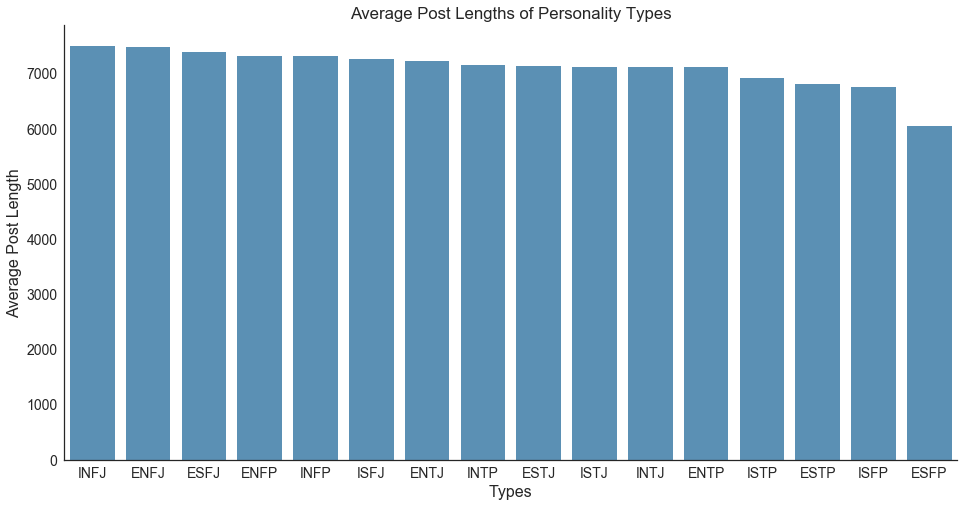

In [30]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[0])
                                                                        

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__. Avarage posts are __above 6000 chars__. INTJ type has the maximum avarage post lenth. We can conclude that `ESFP` type people tend to write shortly while `INFJ` personality type have a tendency of writing longer.

In [31]:
## words_per_comment shows how many words there appears in each comment on the blog for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

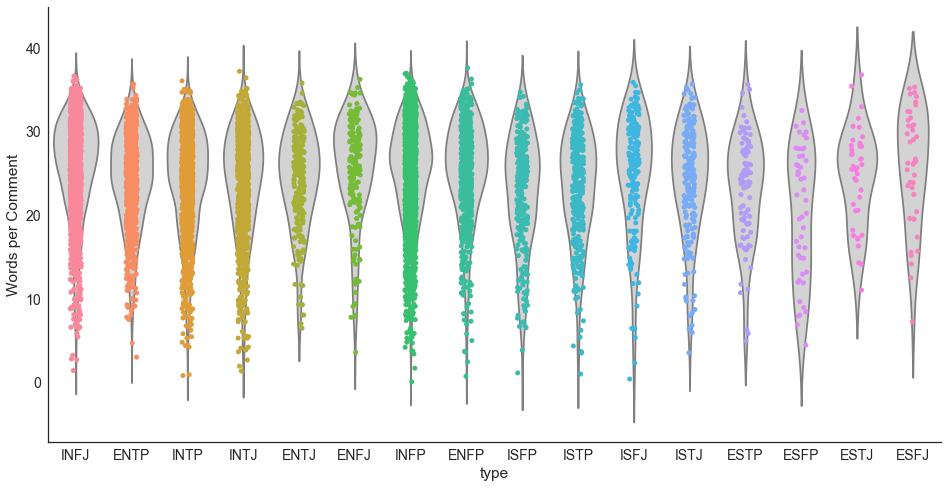

In [32]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()

#### As we can figure out from the graphic particularly last 4 ones are the combination of Extroversion type. Their posts in each comment have spread less than other types. 

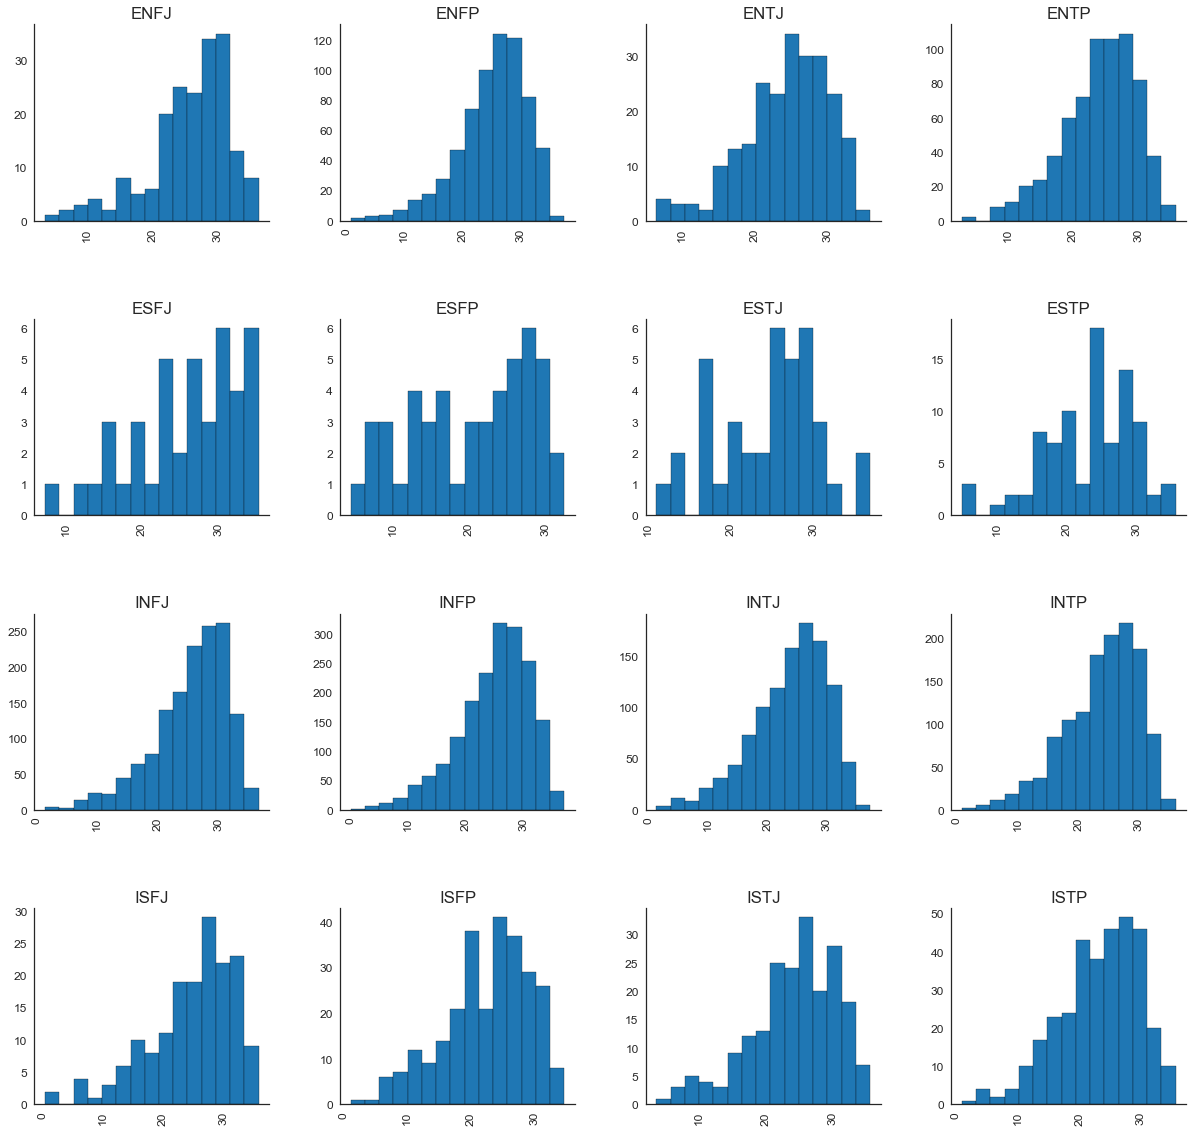

In [33]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=15, xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[0], edgecolor='black') 
sns.despine()

When we check the histogram plot of per comments of each personality types, Intoversion type's words counts in each posts seem distributed normal, on the other hand the word count of some of Etroversion type seems bimodel or multimodal

## Feature Correlation

In [34]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

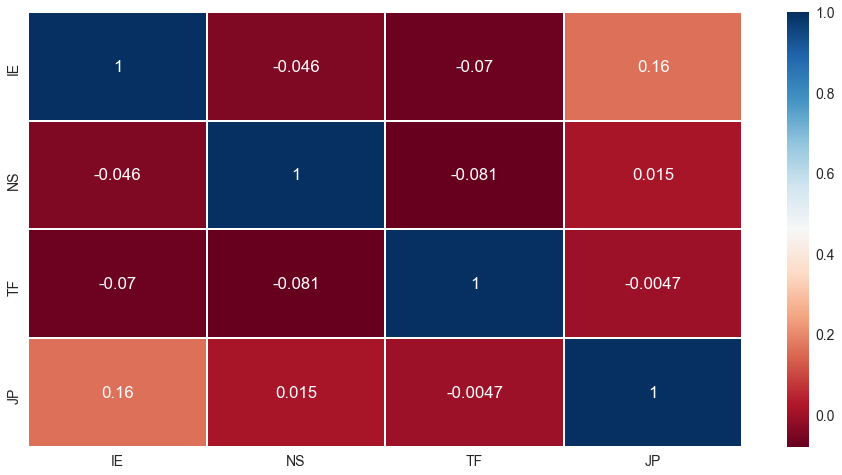

In [35]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)
plt.show()

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## Word Cloud

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [40]:
def wordcloud_show(personality_type):
        
        dataFile = df[df['type']==personality_type]
        text = str(dataFile['posts'].tolist())
        image_file = '{}'.format(personality_type)
        mask_type = np.array(Image.open(image_file+'.png'))
        stopwords = set(STOPWORDS)

        wc = WordCloud(background_color="white", max_words=2000, mask=mask_type, stopwords=stopwords,)
        # generate word cloud
        wc.generate(text)

        # create coloring from image
        image_colors = ImageColorGenerator(mask_type)

        # show
        plt.figure(figsize=(20,10))

        plt.subplot(121)
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(image_file, loc='Center', fontsize=14)
        plt.axis("off")

        plt.subplot(122)
        plt.imshow(mask_type, cmap=plt.cm.gray, interpolation="bilinear")
        
        if personality_type == 'INTJ':
            title_is = 'ARCHITECT'
        elif personality_type == 'INTP':
            title_is = 'LOGICIAN'
        elif personality_type == 'ENTJ':
            title_is = 'COMMANDER'
        elif personality_type == 'ENTP':
            title_is = 'DEBATER' 
        elif personality_type == 'INFJ':
            title_is = 'ADVOCATE'    
        elif personality_type == 'INFP':
            title_is = 'MEDIATOR'
        elif personality_type == 'ENFJ':
            title_is = 'PROTAGONIST'
        elif personality_type == 'ENFP':
            title_is = 'CAMPAIGNER' 
        elif personality_type == 'ISTJ':
            title_is = 'LOGISTICAN'
        elif personality_type == 'ISFJ':
            title_is = 'DEFENDER'
        elif personality_type == 'ESTJ':
            title_is = 'EXECUTIVE'
        elif personality_type == 'ESFJ':
            title_is = 'CONSUL'
        elif personality_type == 'ISTP':
            title_is = 'VIRTUOSO'
        elif personality_type == 'ISFP':
            title_is = 'ADVENTURER'
        elif personality_type == 'ESTP':
            title_is = 'ENTREPRENUER'
        elif personality_type == 'ESFP':
            title_is = 'ENTERTAINER'    
        plt.title(title_is, loc='Center', fontsize=14)
        plt.axis("off")

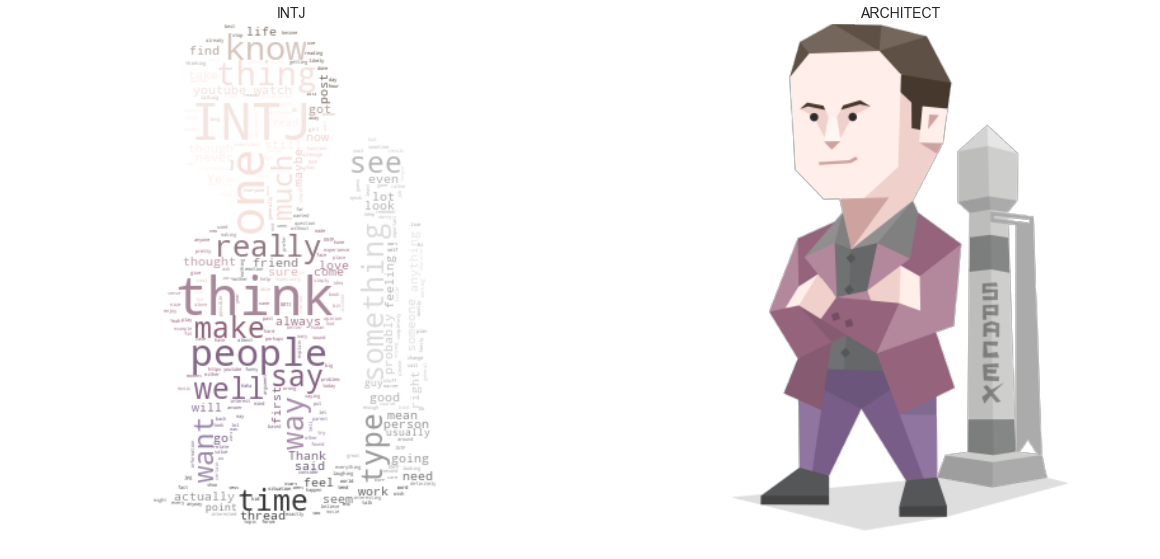

In [41]:
wordcloud_show('INTJ')

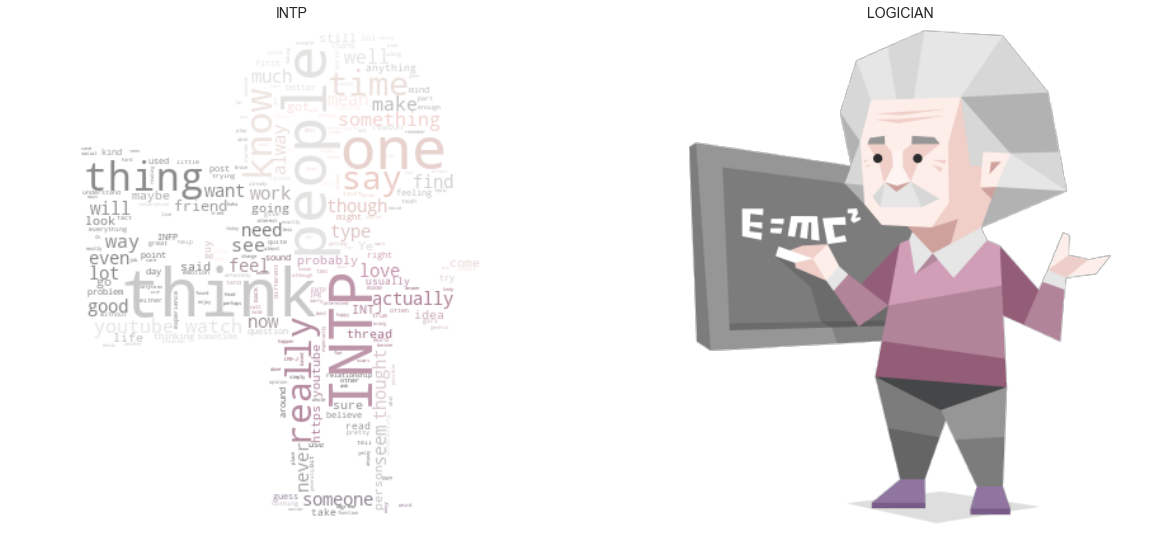

In [42]:
wordcloud_show('INTP')

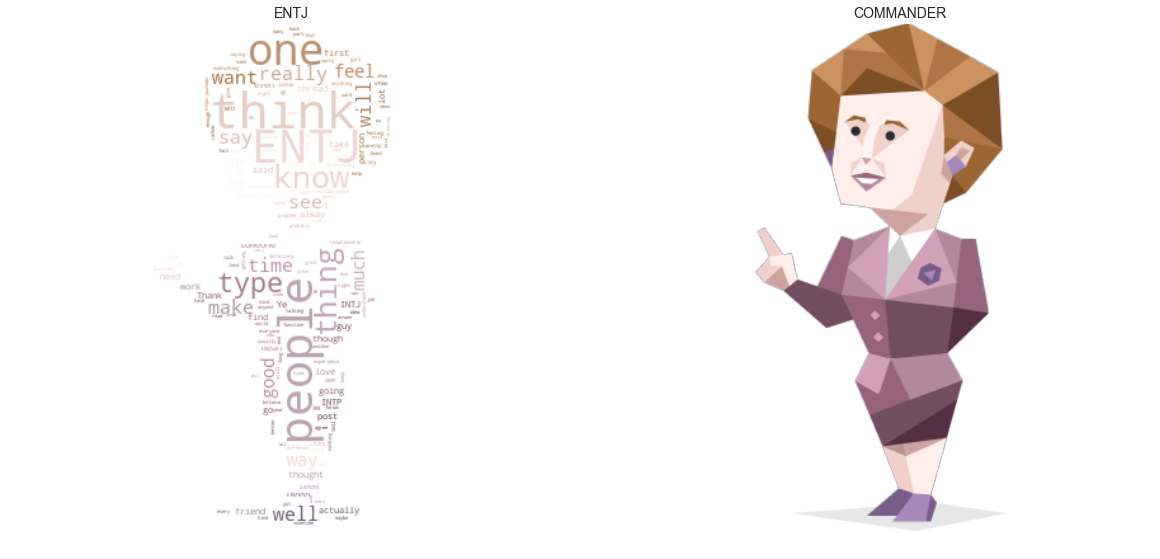

In [43]:
wordcloud_show('ENTJ')

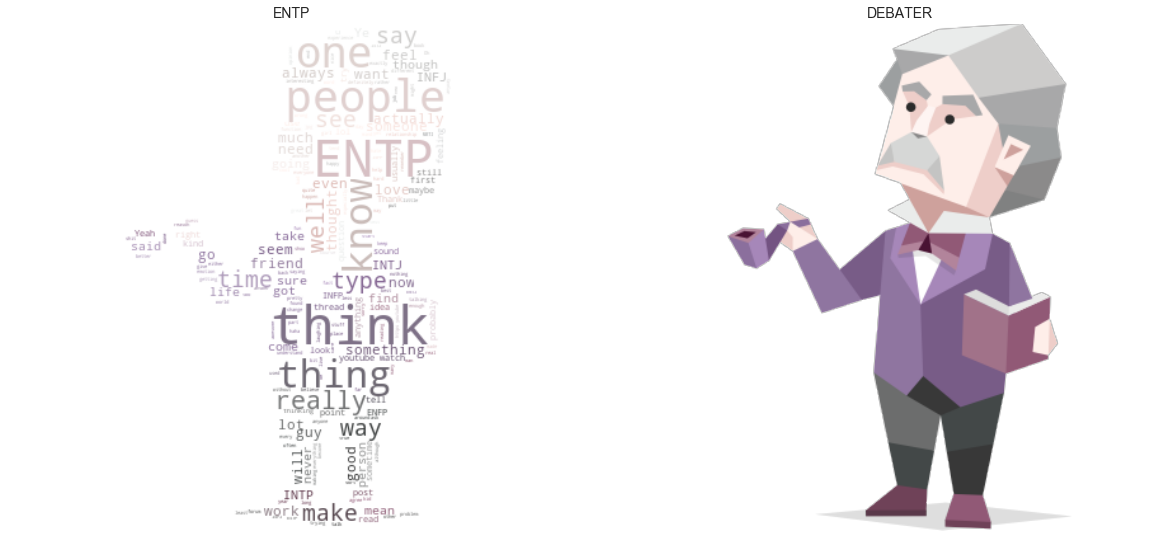

In [44]:
wordcloud_show('ENTP')

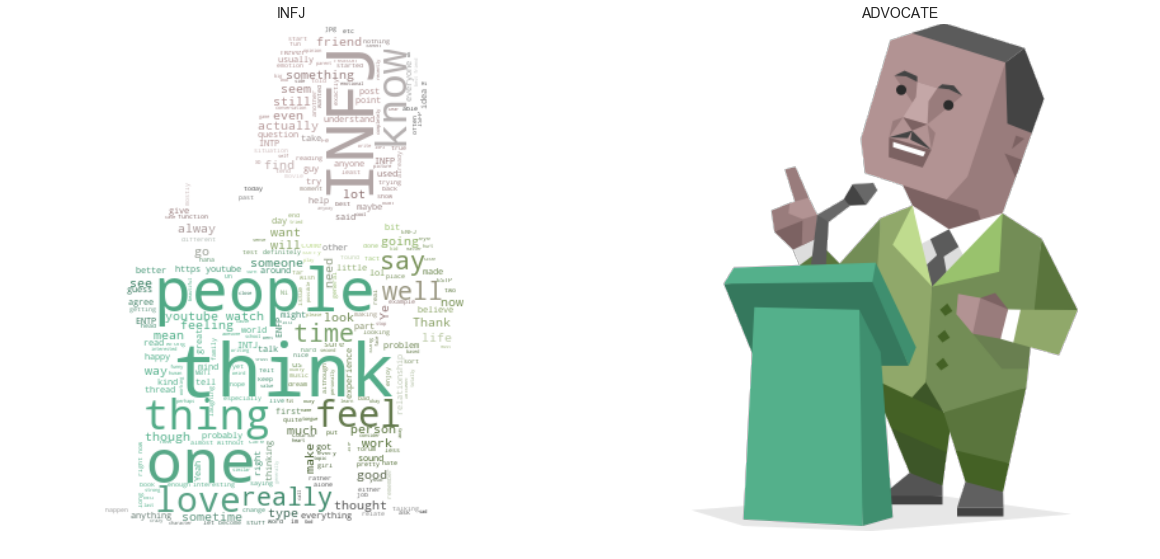

In [45]:
wordcloud_show('INFJ')

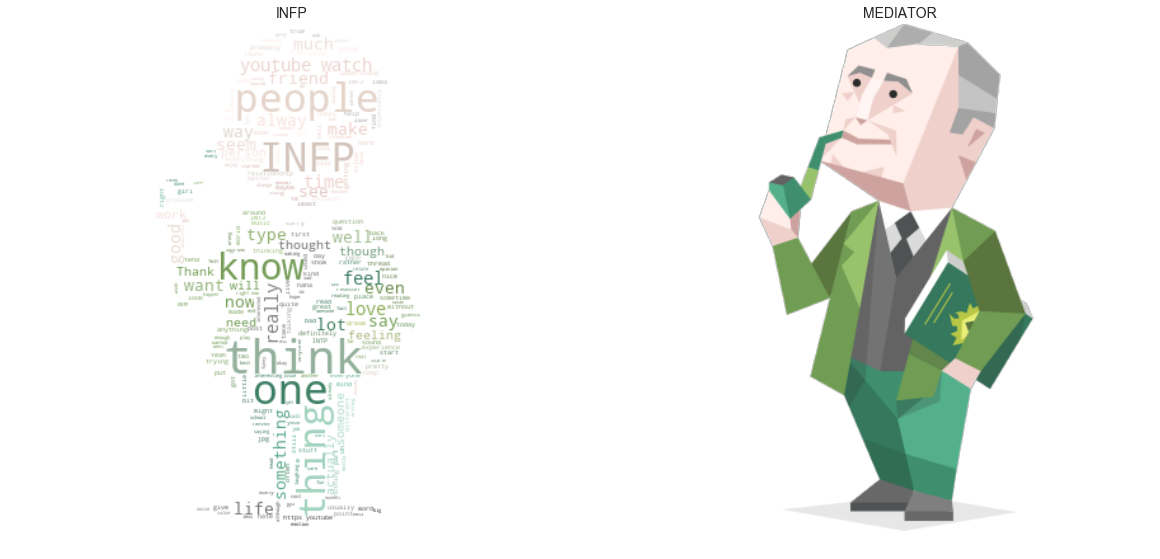

In [46]:
wordcloud_show('INFP')

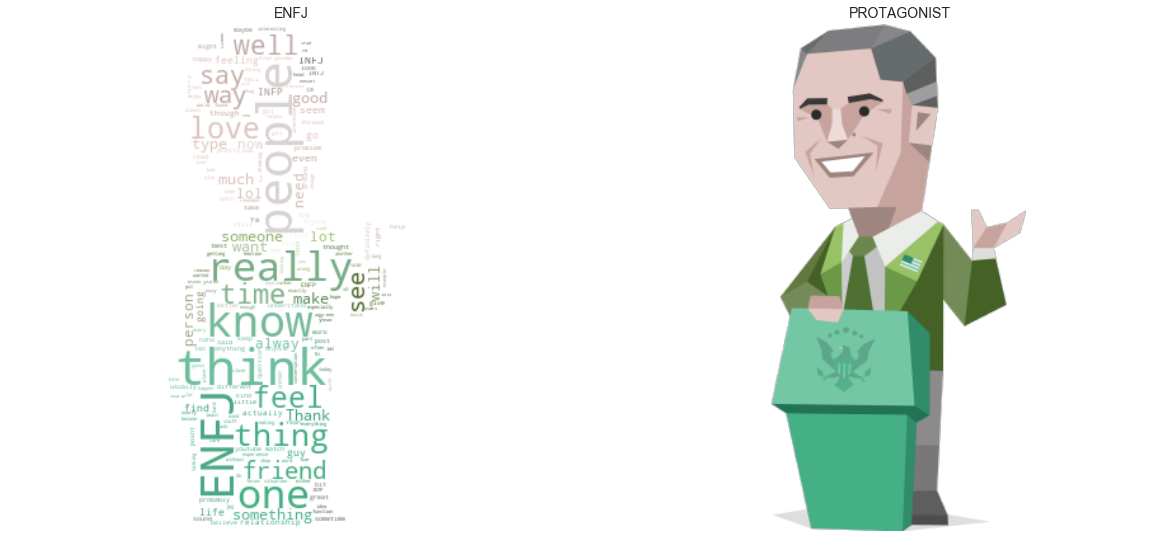

In [47]:
wordcloud_show('ENFJ')

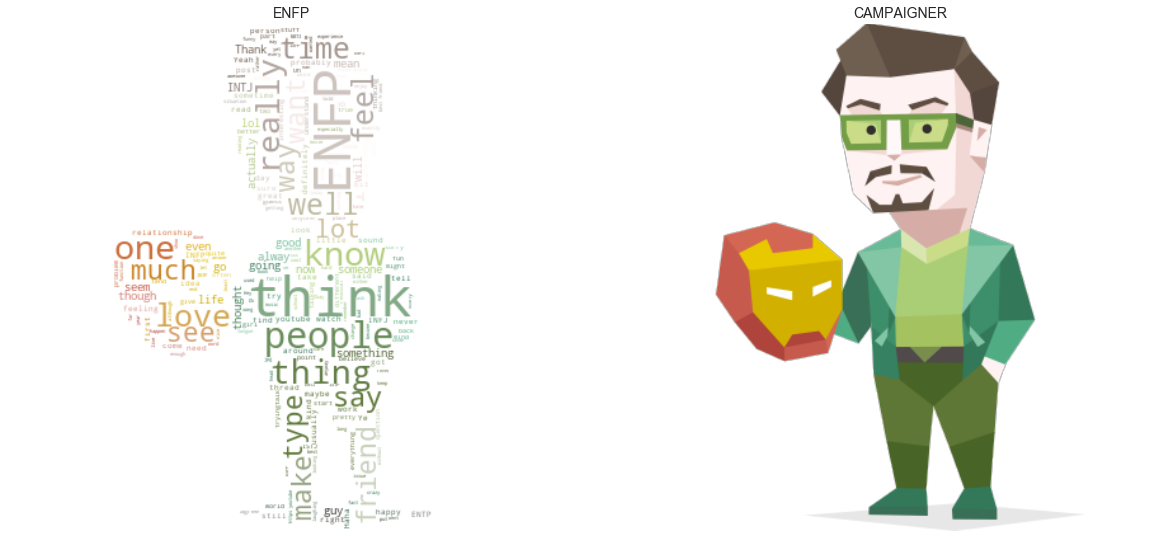

In [48]:
wordcloud_show('ENFP')

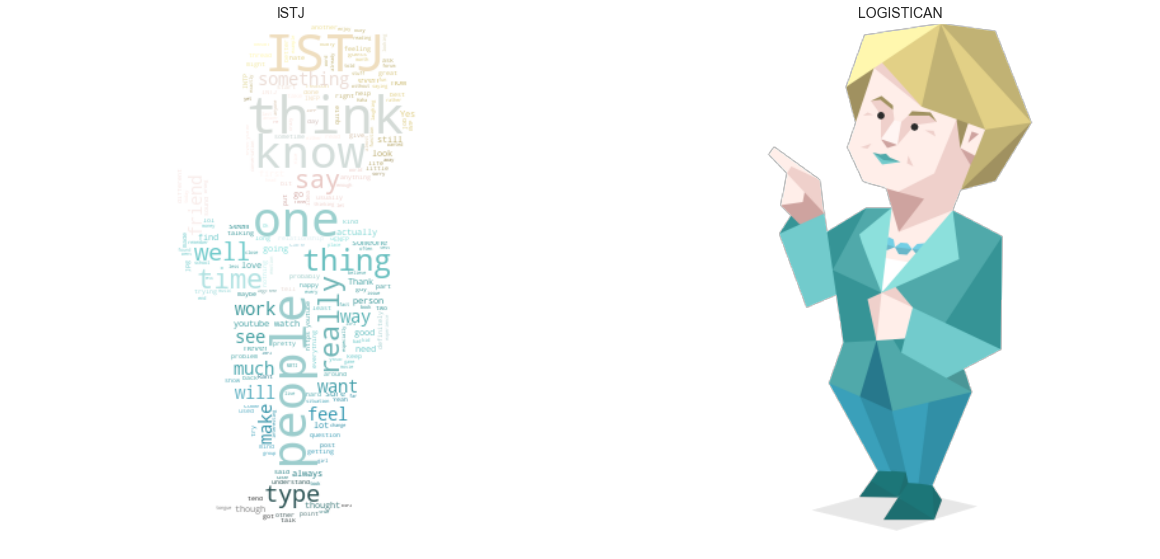

In [49]:
wordcloud_show('ISTJ')

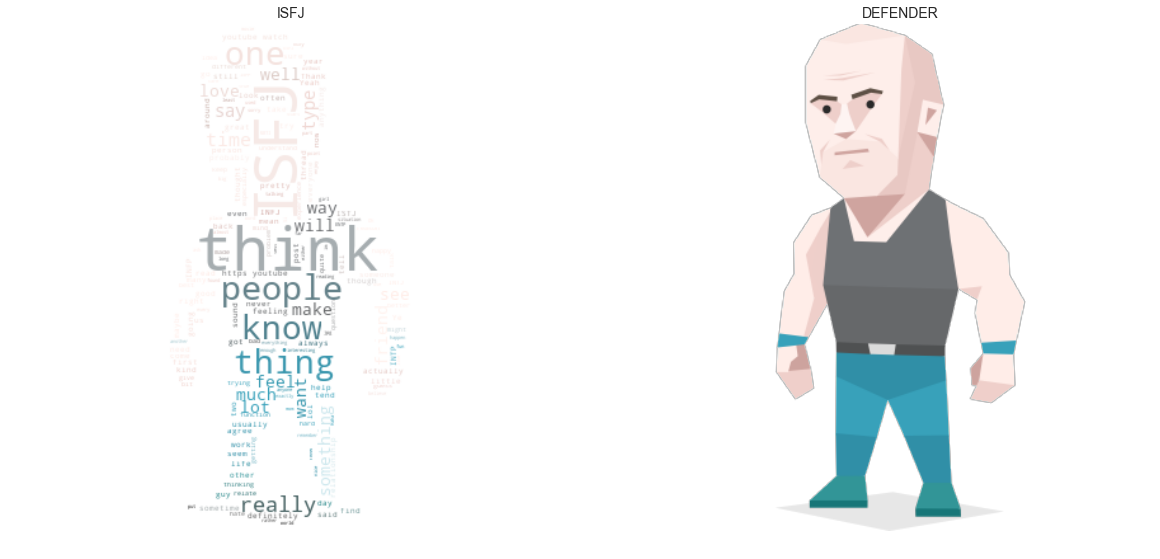

In [50]:
wordcloud_show('ISFJ')

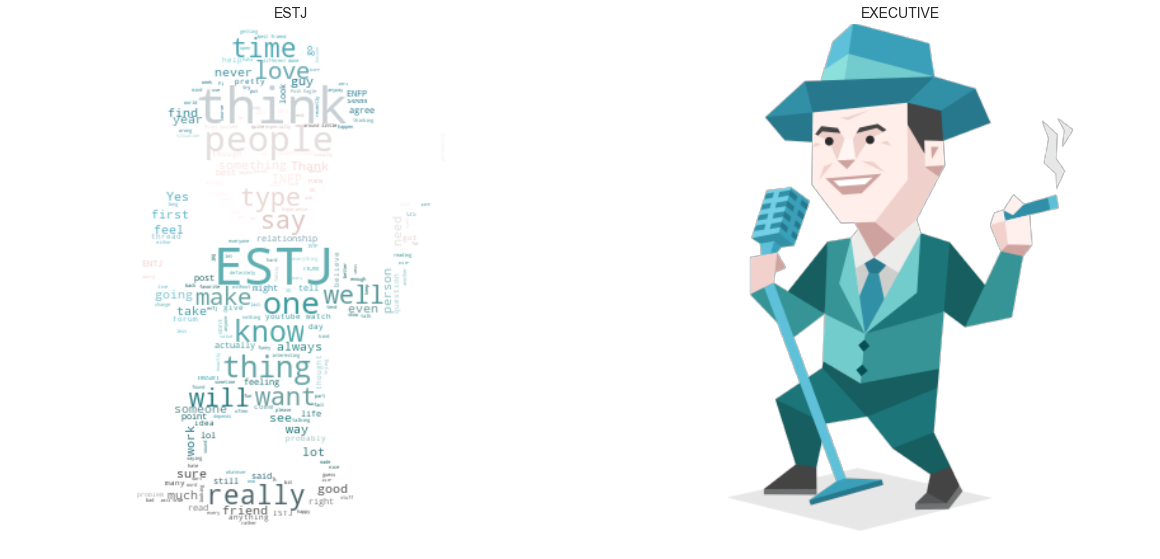

In [51]:
wordcloud_show('ESTJ')

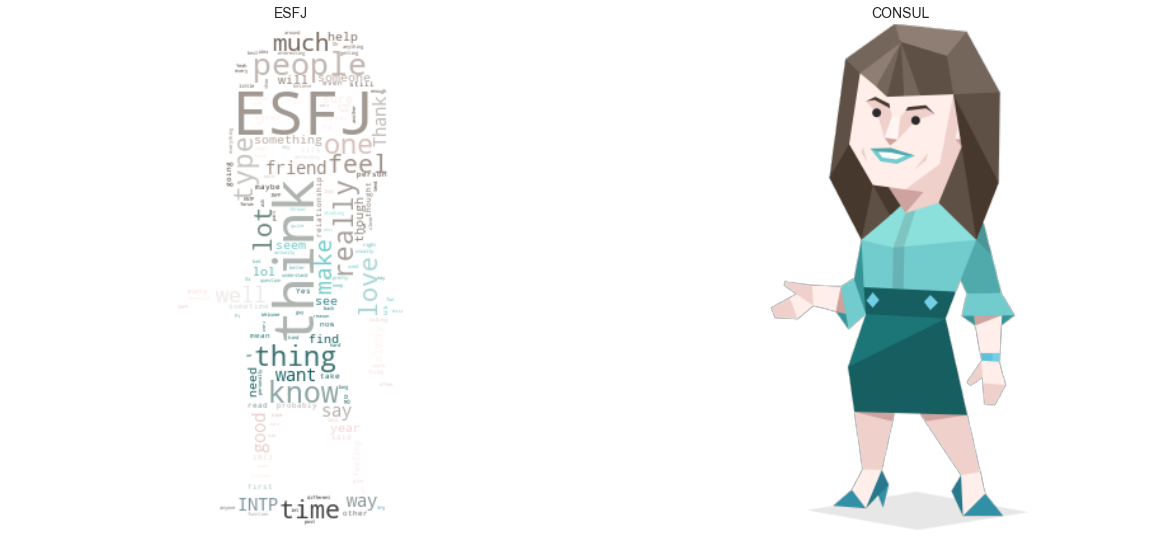

In [52]:
wordcloud_show('ESFJ')

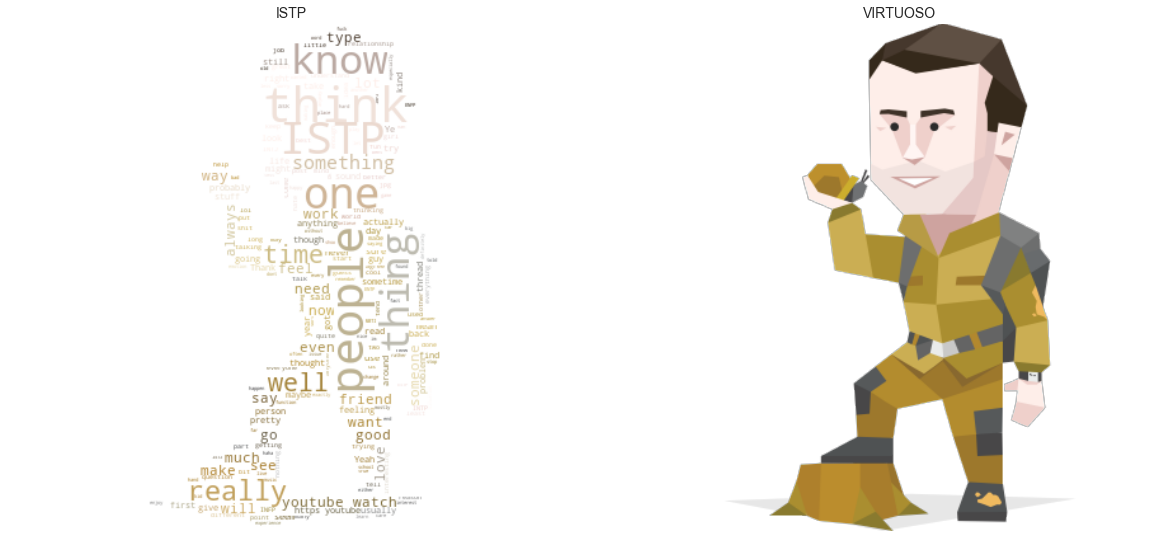

In [53]:
wordcloud_show('ISTP')

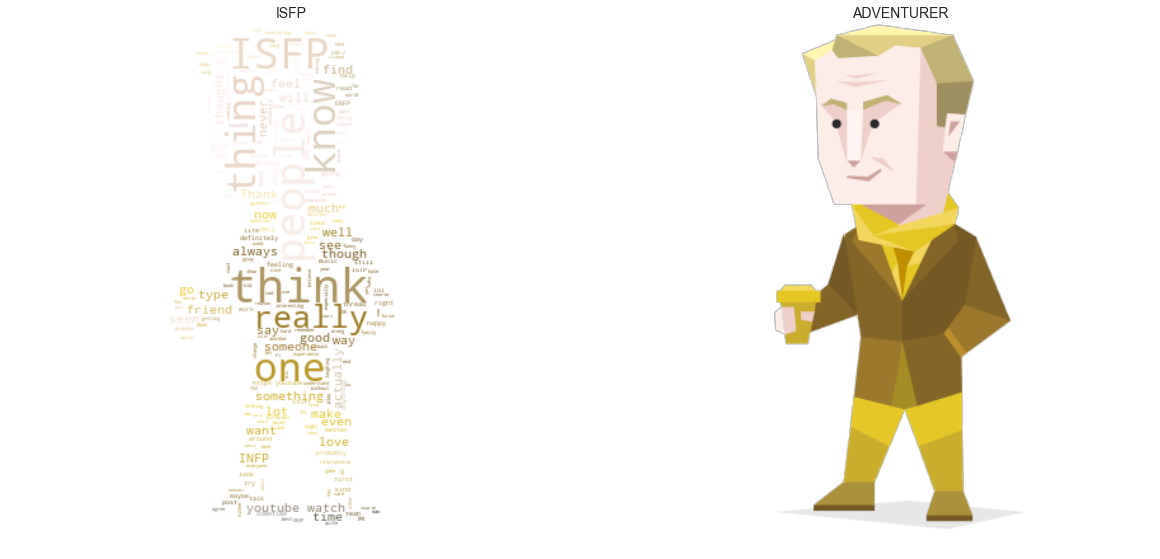

In [54]:
wordcloud_show('ISFP')

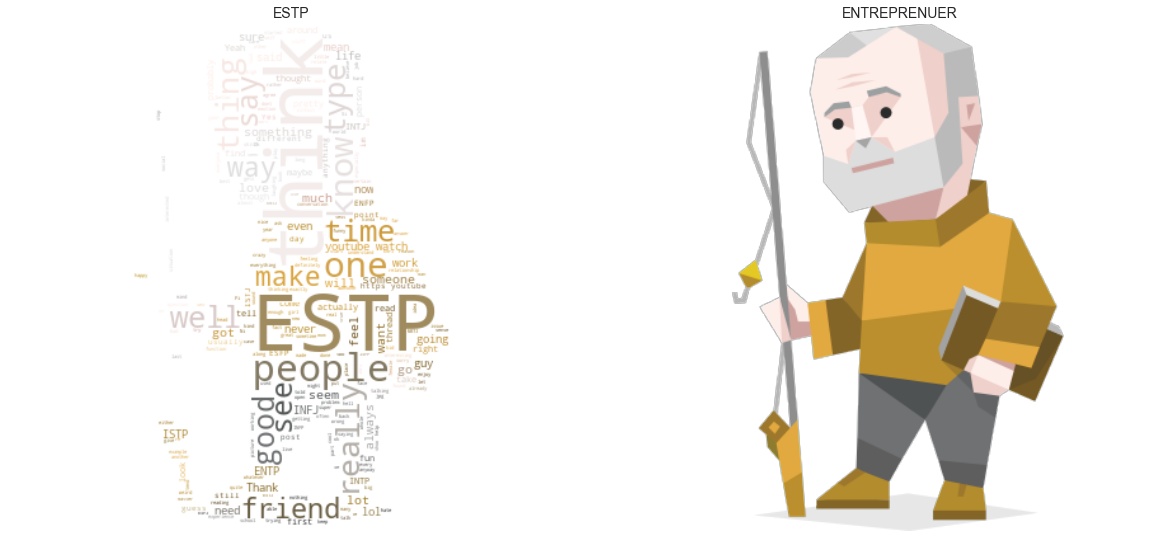

In [55]:
wordcloud_show('ESTP')

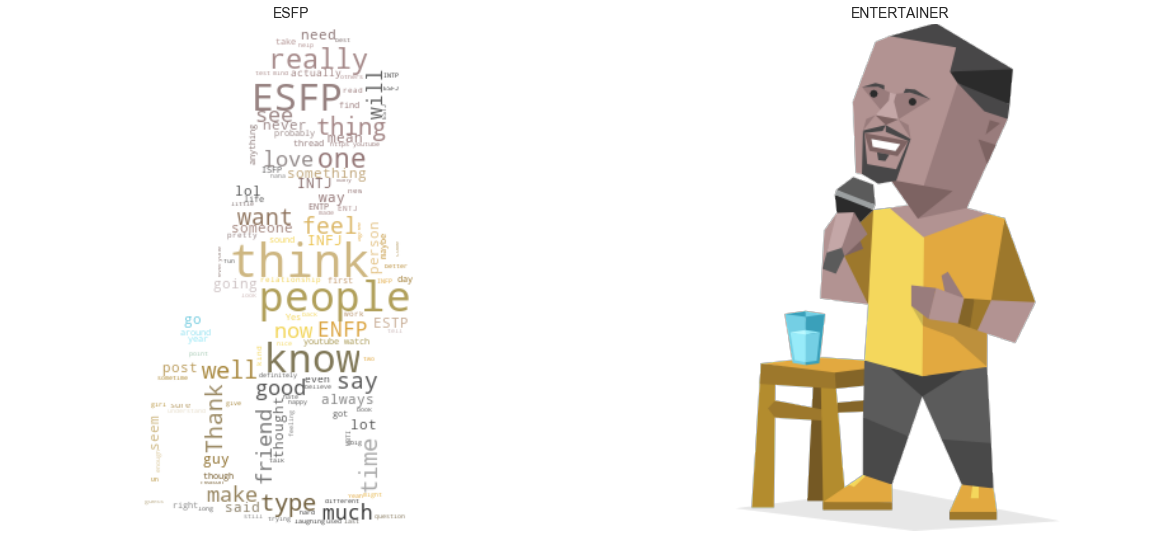

In [56]:
wordcloud_show('ESFP')

### For more information regarding  MBTI personality types, please see the image below. (Note: image is obtained from <https://www.businessinsider.com/best-jobs-for-every-personality-2014-9>)

![alt text](types.png "Jobs Based on MBTI Personality Types")